In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

%load_ext autoreload
%autoreload 2

## Simulation

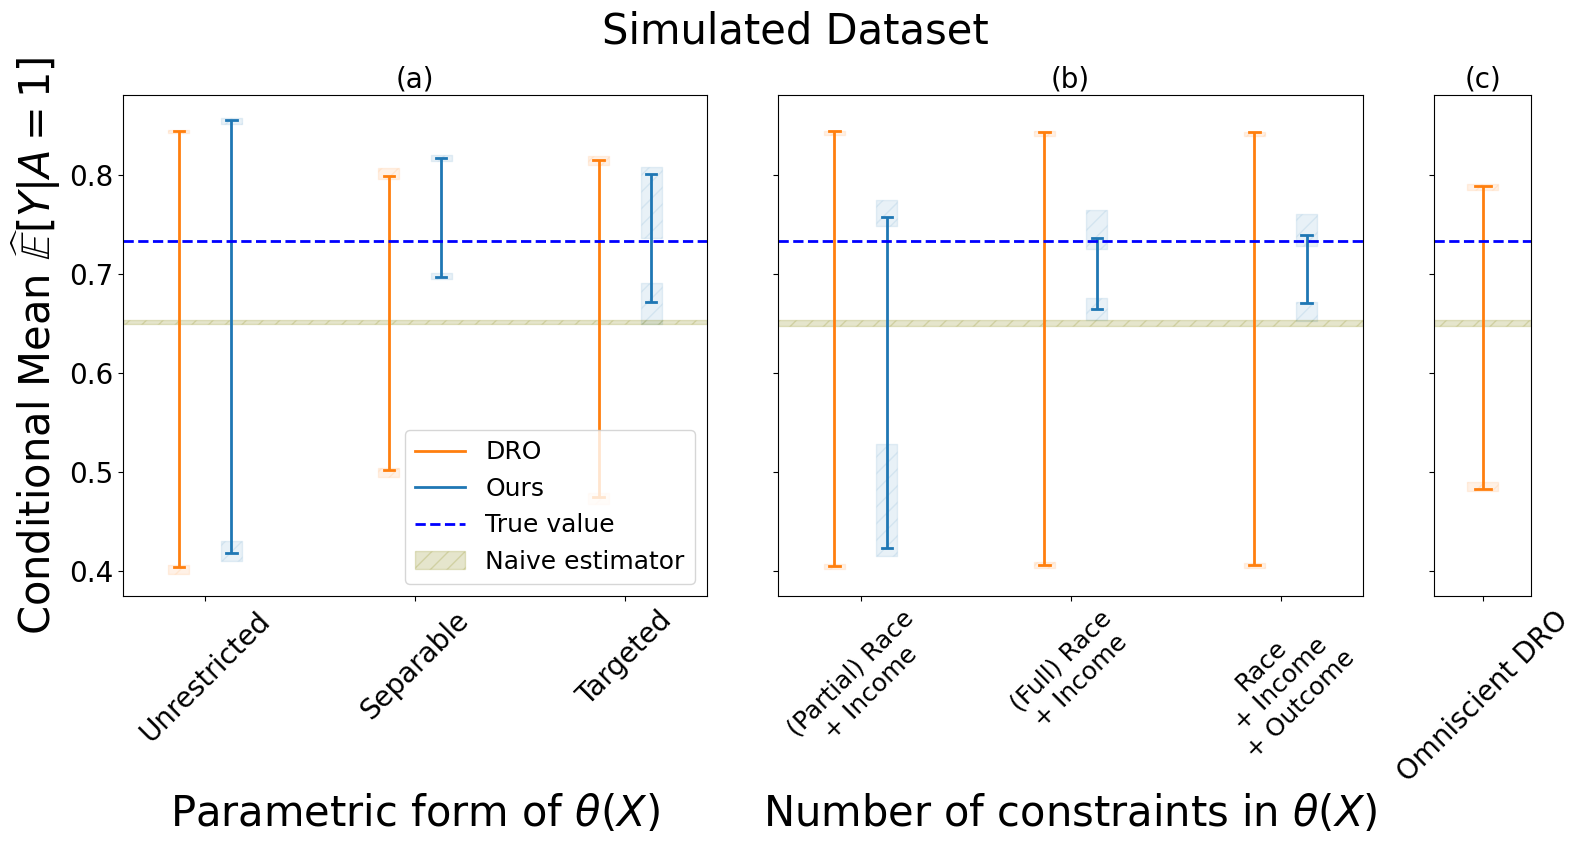

In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


plotting_df_123 = utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/",
    timestamp_ours="Oct11-1622",
    timestamp_dro="Oct11-1623",
    ax=ax[0],
)

plotting_df_456 = utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp_ours="Oct11-1557",
    timestamp_dro="Oct11-1558",
    ax=ax[1],
)

utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="synthetic_123",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(a)", fontsize=20)
ax[1].set_title("(b)", fontsize=20)
ax[2].set_title("(c)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Simulated Dataset", fontsize=30, y=1.05)
fig.savefig("../synthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

In [38]:
print(f"True conditional mean: {plotting_df_123['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_123.replace(
        {
            "Nx12": "Unrestricted",
            "Nx6": "Separable",
            "Nx8": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True conditional mean: {plotting_df_456['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_456.replace(
        {
            "DRO_worst_case": "DRO",
            "count_minus": "(Partial) Race + Income",
            "count": "(Full) Race + Income",
            "count_plus": "Race + Income + Outcome",
        }
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True conditional mean: 0.376


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                  0.129  0.004     0.433  0.008
             Ours                 0.371  0.007     0.383  0.009
Targeted     DRO                  0.129  0.004     0.433  0.008
             Ours                 0.366  0.015     0.385  0.010
Unrestricted DRO                  0.132  0.055     0.602  0.107
             Ours                 0.161  0.003     0.509  0.004

True conditional mean: 0.376


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income        0.160  0.004     0.513   
(Partial) Race + Income (Partial) Race + Income     0.067  0.004     0.666   
DRO                     (Full) Race + Income        0.093  0.003     0.678   
                        (Partial) Race + Income     0.064  0.004     0.753   
                        Race + Income + Outcome     0.093  0.003     0.677   
Race + Income + Outcome Race + Income + Outcome     0.184  0.008     0.389   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.006  
(Partial) Race + Income (Partial) Race + Income  0.012  
DRO                     (Full) Race + Income     0.014  
                        (Partial) Race + Income  0.015  
                        Race + Income + Outcome  0.013  
Race + Income + Outcome Race + Income + Outcome  0.007

## Folktables

/Users/carlospatino/Factored/inference_contrained_distribution_shift/plotting/utils.py:51: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_steps = plotting_df.groupby(["matrix_type", "restriction_type"]).max()


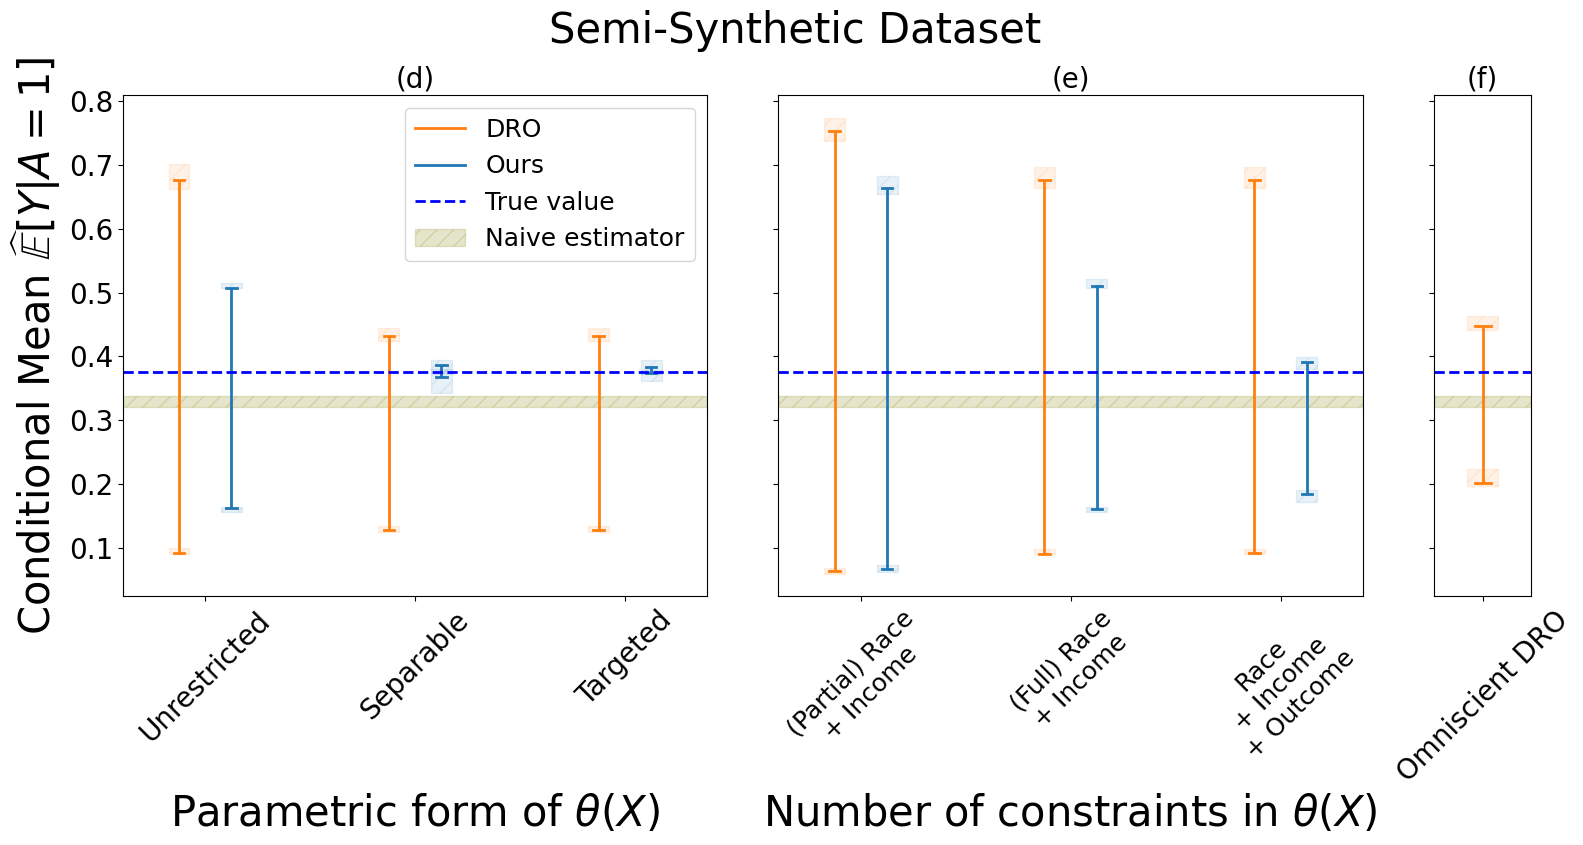

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


plotting_df_123 = utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/",
    timestamp_ours="semisynthetic_123",
    timestamp_dro="semisynthetic_123_DRO",
    ax=ax[0],
)

plotting_df_456 = utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp_ours="semisynthetic_456",
    timestamp_dro="semisynthetic_456_DRO",
    ax=ax[1],
)
utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="semisynthetic_123",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="upper right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(d)", fontsize=20)
ax[1].set_title("(e)", fontsize=20)
ax[2].set_title("(f)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Synthetic Dataset", fontsize=30, y=1.05)
fig.savefig("../semisynthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

In [37]:
print(f"True conditional mean: {plotting_df_123['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_123.replace(
        {
            "Nx12": "Unrestricted",
            "Nx6": "Separable",
            "Nx8": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True conditional mean: {plotting_df_456['true_conditional_mean'].mean():.3f}")
display(
    plotting_df_456.replace(
        {
            "DRO_worst_case": "DRO",
            "count_minus": "(Partial) Race + Income",
            "count": "(Full) Race + Income",
            "count_plus": "Race + Income + Outcome",
        }
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True conditional mean: 0.376


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                  0.129  0.004     0.433  0.008
             Ours                 0.371  0.007     0.383  0.009
Targeted     DRO                  0.129  0.004     0.433  0.008
             Ours                 0.366  0.015     0.385  0.010
Unrestricted DRO                  0.132  0.055     0.602  0.107
             Ours                 0.161  0.003     0.509  0.004

True conditional mean: 0.376


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income        0.160  0.004     0.513   
(Partial) Race + Income (Partial) Race + Income     0.067  0.004     0.666   
DRO                     (Full) Race + Income        0.093  0.003     0.678   
                        (Partial) Race + Income     0.064  0.004     0.753   
                        Race + Income + Outcome     0.093  0.003     0.677   
Race + Income + Outcome Race + Income + Outcome     0.184  0.008     0.389   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.006  
(Partial) Race + Income (Partial) Race + Income  0.012  
DRO                     (Full) Race + Income     0.014  
                        (Partial) Race + Income  0.015  
                        Race + Income + Outcome  0.013  
Race + Income + Outcome Race + Income + Outcome  0.007

## Regression

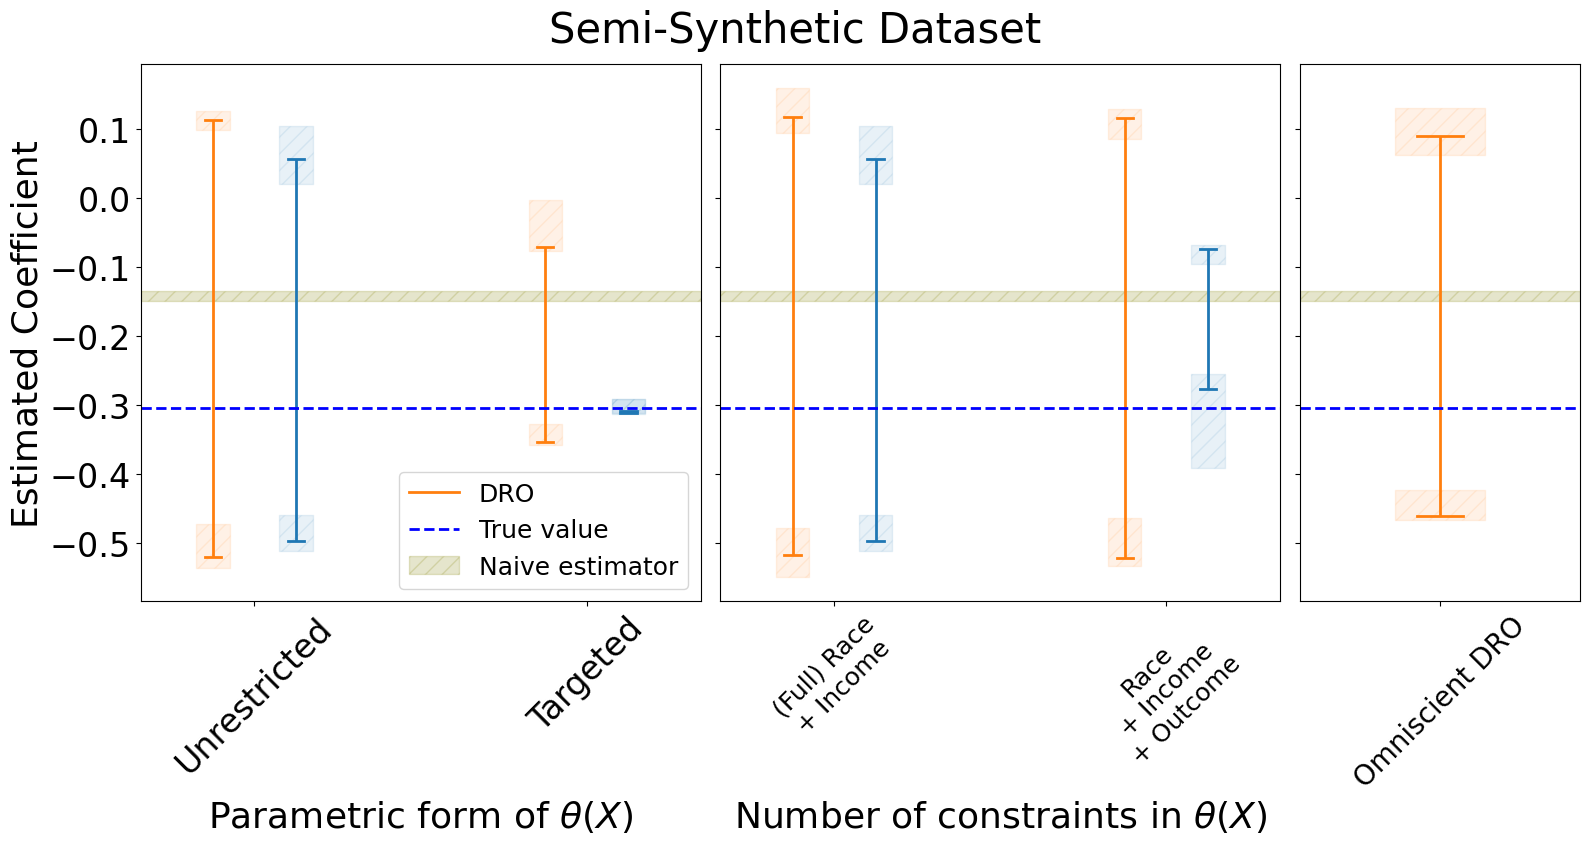

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[2, 2, 1])

plotting_df_12 = utils.generate_theta_plots_1_2_regression(
    base_path="../experiment_artifacts/",
    timestamp_ours="regression_1_2",
    timestamp_dro="Oct13-2224",
    ax=ax[0],
)

plotting_df_34 = utils.generate_theta_plots_3_4_regression(
    base_path="../experiment_artifacts/",
    timestamp_ours="regression_3_4",
    timestamp_dro="Oct14-0552",
    ax=ax[1],
)

utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="Oct14-1316",
    ax=ax[2],
    empirical_field="empirical_coef",
    true_field="true_coef",
)

handles, labels = ax[1].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-2:]
relevant_labels = labels[0:1] + labels[-2:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Synthetic Dataset", fontsize=30, y=1.05)

fig.savefig("../regression_coeff.png", dpi=300, bbox_inches="tight")

In [36]:
print(f"True coefficient: {plotting_df_12['true_coef'].mean():.3f}")
display(
    plotting_df_12.replace(
        {
            "Nx12": "Unrestricted",
            "Nx6": "Separable",
            "Nx8": "Targeted",
            "DRO_worst_case": "DRO",
            "count": "Ours",
        }
    )
    .groupby(["matrix_type", "restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

print(f"True coefficient: {plotting_df_34['true_coef'].mean():.3f}")
display(
    plotting_df_34.replace(
        {"count": "(Full) Race + Income", "count_plus": "Race + Income + Outcome"}
    )
    .groupby(["restriction_type", "dro_restriction_type"])[["min_bound", "max_bound"]]
    .agg(["mean", "std"])
    .round(3)
)

True coefficient: -0.305


min_bound        max_bound       
                                   mean    std      mean    std
matrix_type  restriction_type                                  
Separable    DRO                 -0.345  0.013    -0.055  0.033
             Ours                -0.305  0.010    -0.303  0.009
Unrestricted DRO                 -0.513  0.026     0.112  0.011
             Ours                -0.492  0.022     0.062  0.036

True coefficient: -0.305


min_bound        max_bound  \
                                                     mean    std      mean   
restriction_type        dro_restriction_type                                 
(Full) Race + Income    (Full) Race + Income       -0.492  0.022     0.062   
DRO_worst_case          (Full) Race + Income       -0.515  0.028     0.123   
                        Race + Income + Outcome    -0.509  0.029     0.110   
Race + Income + Outcome Race + Income + Outcome    -0.304  0.057    -0.079   

                                                        
                                                   std  
restriction_type        dro_restriction_type            
(Full) Race + Income    (Full) Race + Income     0.036  
DRO_worst_case          (Full) Race + Income     0.025  
                        Race + Income + Outcome  0.017  
Race + Income + Outcome Race + Income + Outcome  0.011

In [34]:
plotting_df_34.groupby(["restriction_type"])[["min_bound", "max_bound"]].agg(
    ["mean", "std"]
).round(3)

min_bound        max_bound       
                      mean    std      mean    std
restriction_type                                  
DRO_worst_case      -0.512  0.029     0.117  0.022
count               -0.492  0.022     0.062  0.036
count_plus          -0.304  0.057    -0.079  0.011

## Covariance

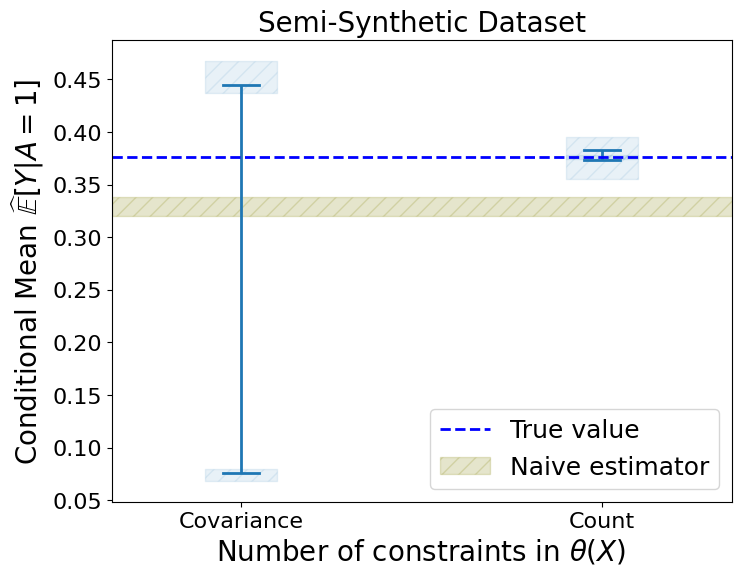

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

utils.generate_cov_plots(
    base_path="../experiment_artifacts/", timestamp="cov_results", ax=ax
)

handles, labels = ax.get_legend_handles_labels()
relevant_handles = handles[-2:]
relevant_labels = labels[-2:]
ax.legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax.set_title("Semi-Synthetic Dataset", fontsize=20)
fig.savefig("../semisynthetic_cov_restriction.png")